This notebook demonstrates how to perfomr systematic the policy assessment and render the policy cards. 

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from res_ind_lib import *

#Imports the function to plot render the policy experiments
from policy_assessment import *

#ask jupyter to display the plots within this notebook
%matplotlib inline

# Data

## baseline data

In [2]:
#Load the excel data file into a dataframe (table)
df_original=pd.read_excel("inputs/all_data_compiled.xlsx", 
                 index_col=0, #tells Pandas to use the first column (Provinces) as the index of the table
                 skiprows=[0, 2] #The first (0) row is a description of the variables and the 3rd (2) row is empty. We skip them
                ).dropna() 
df_original.index.name="province"
#Displays the first rows of that dataframe
df_original=def_ref_values(df_original)


## policy experiment data

In [3]:
##POLICY DESCRIPTION
policy_info= pd.read_csv("inputs/policy_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels = policy_info.descriptor.copy() #we make a copy so we can modify it later
policy_labels.head()

#size of the policy
pol_increment = policy_info.increment    

# Parameters

In [9]:
colors = pd.read_csv("inputs/colors_pol_assess.csv", index_col=0)
pol_assess_set = colors.index
colors

,color,edgecolor,alpha
dWtot_currency,#a6cee3,#1f78b4,1
dKtot,#cccccc,#969696,1


In [10]:
#unit for welfare and asset loses changes
unit = dict(multiplier = 1e-3, string = "million pesos per year")

# Checking for out of bound problems

In [11]:
bounds= pd.read_csv("inputs/inputs_info.csv", index_col="key")
bounds.head(3)   

,descriptor,inf,sup
key,,,
avg_prod_k,Productivity of capital,0,10
dcap,Average consumption losses for poor people in ...,0,NaN
dcar,Average consumption losses for nonpoor people ...,0,NaN


In [12]:
clipped = check_bounds(df_original+pol_increment, bounds)

# Computing

In [13]:
deltas = compute_policies(df_original,pol_increment,pol_assess_set, bounds)
deltas.head()

Currently working on:  done.


province            Abra                Agusan del Norte                 \
outputs            dKtot dWtot_currency            dKtot dWtot_currency   
inputs                                                                    
T_rebuild_K     0.000000     108.023502         0.000000    2401.756537   
cp              0.050349      -0.113960         1.313773      -3.613606   
cr              0.122894      -0.085794         2.386512      -1.354276   
fap          9347.658262   42444.553120     30906.099236  170674.206074   
far          5011.391772    7000.665833     19993.993601   22727.266716   

province    Agusan del Sur                         Aklan                  \
outputs              dKtot dWtot_currency          dKtot  dWtot_currency   
inputs                                                                     
T_rebuild_K       0.000000    3209.376872       0.000000    92744.539243   
cp                2.048066      -5.605672      36.861058     -108.678591   
cr                2.395623      -1.576315     102.842465      -69.525881   
fap           48739.233491  267755.380058  229029.748419  1364292.668060   
far           18469.531003   24327.727945  206022.211153   280314.511305   

province             Albay                      ...           Tawi-tawi  \
outputs              dKtot  dWtot_currency      ...               dKtot   
inputs                                          ...                       
T_rebuild_K       0.000000    15156.735270      ...            0.000000   
cp                9.676592      -29.104672      ...            0.404334   
cr               11.982329       -7.325968      ...            1.314940   
fap          693215.895680  4188462.695184      ...        12972.203252   
far          322287.036164   394390.222673      ...         8902.439089   

province                         Zambales                Zamboanga Sibugay  \
outputs     dWtot_currency          dKtot dWtot_currency             dKtot   
inputs                                                                       
T_rebuild_K    1065.763765       0.000000    8676.375633          0.000000   
cp               -0.698728       2.701583      -5.866102          5.750896   
cr               -1.035695      11.948419      -8.414794          5.890390   
fap           44855.663211  193807.627476  844355.385451     493982.249317   
far           14029.282443  217313.083627  306307.389839     172349.383763   

province                    Zamboanga del Norte                  \
outputs      dWtot_currency               dKtot  dWtot_currency   
inputs                                                            
T_rebuild_K     9196.329894            0.000000    59026.266338   
cp               -17.958283           40.182721     -175.237870   
cr                -4.445589           27.798482      -21.233061   
fap          3101734.245185       696378.963533  6104000.707948   
far           260340.016397       192984.681260   295246.227034   

province    Zamboanga del Sur                 
outputs                 dKtot dWtot_currency  
inputs                                        
T_rebuild_K          0.000000    5748.666899  
cp                   2.883688      -8.417417  
cr                   5.382810      -3.617375  
fap              65329.816346  383859.367732  
far              40941.820428   55121.272690  

[5 rows x 170 columns]

Currently working on:  Quezon


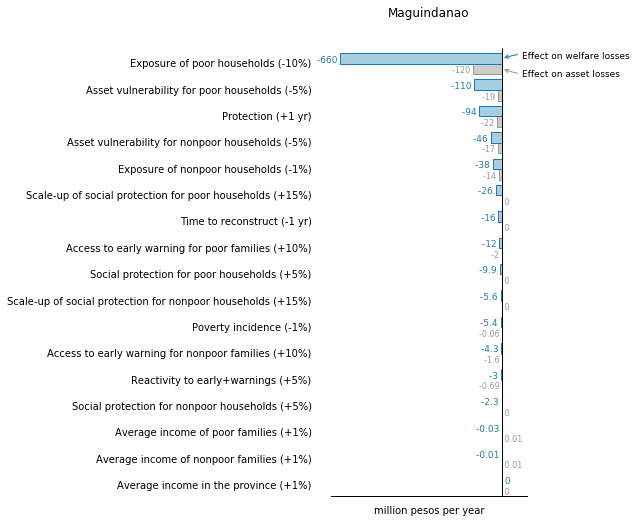

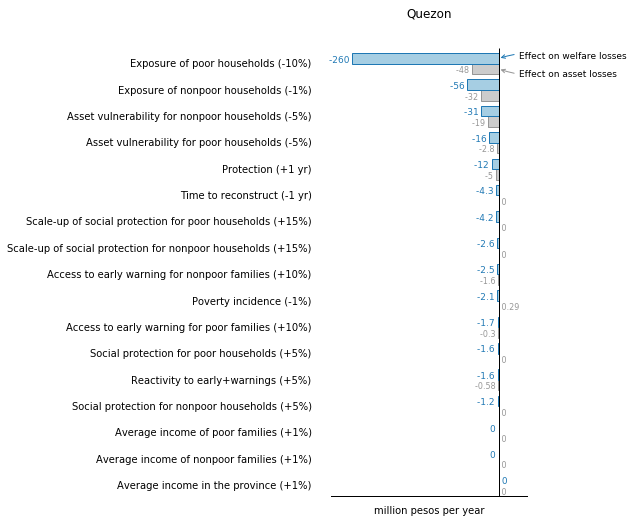

In [ ]:
render_pol_cards(
    deltas,
    colors,
    policy_labels,
    pol_increment,
    unit,
        [ "Maguindanao", "Quezon"])
#     df_original.index)


Currently working on:  sigma_p


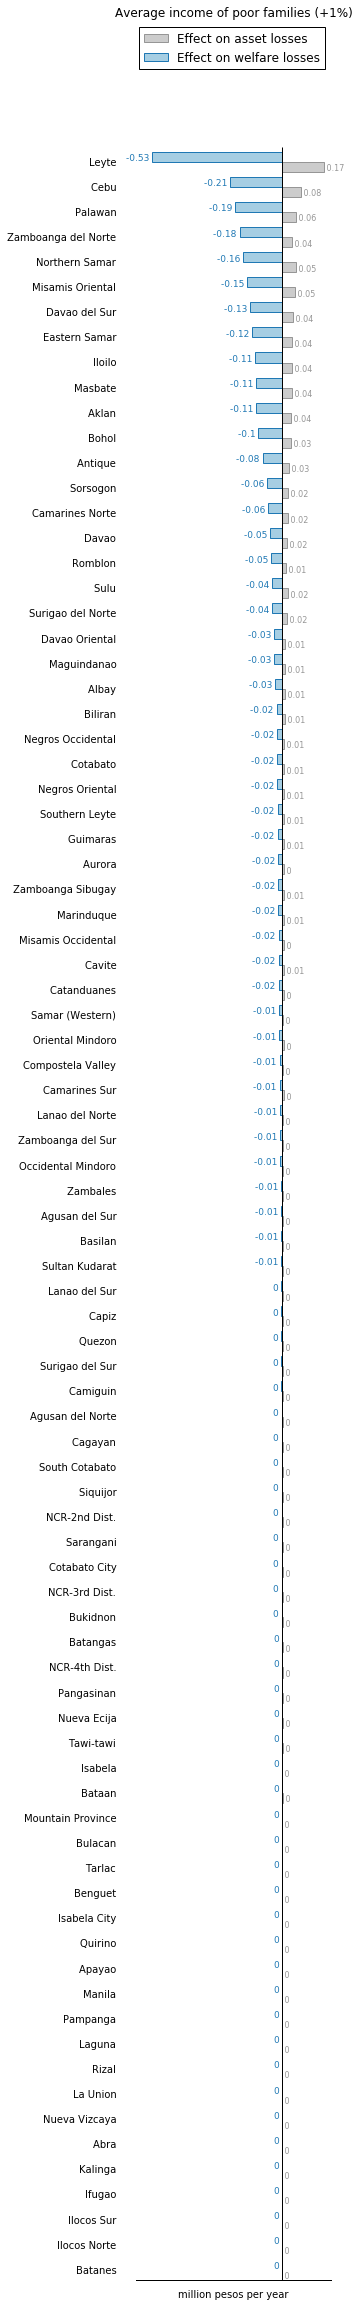

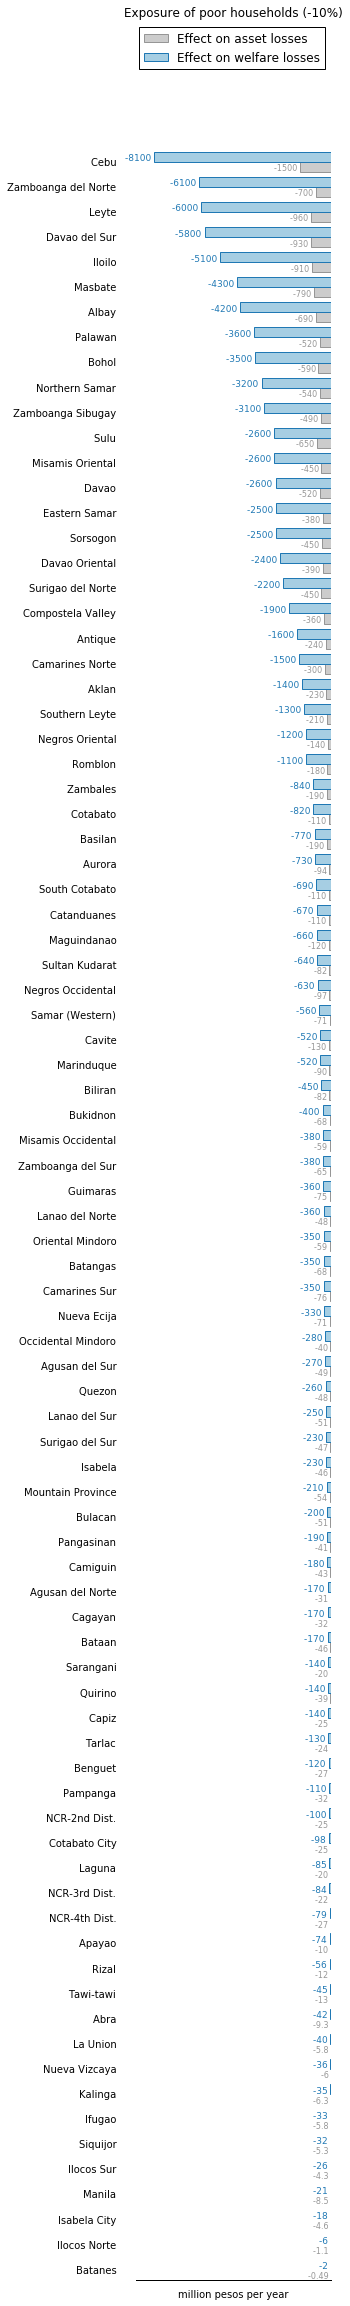

In [ ]:
render_pol_cards_per_policy(
    deltas.stack("province").unstack("inputs").swaplevel("inputs","outputs",axis=1),
    colors,
    policy_labels,
    pol_increment,
    unit,
        ["cp", "fap", "social_p", "sigma_p", "protection"])

# Merge all cards to single pdf

Merges the individual province cards into one big multi page pdf. Requires ghostscript.

In [ ]:
province_list=glob.glob("cards/*.pdf")
merge_cardfiles(province_list,"all_cards.pdf")

Converts the pdf files to png images. Requires Imagemagick.

In [ ]:
convert_pdf_to_png("cards/")

# Demo: policy experiments on the multi-hazard data

Here we demonstrate how to do policy experiments on the multi hazard data. This is just a demo as the data we have now prevents us to have meaningful experiments (river floods and costal floods)

In [ ]:
multi_hard_info=pd.read_csv("inputs/multi_hazard_data.csv", index_col=["province","hazard"])
multi_hard_info.head()

In [ ]:
fr=pd.read_csv("inputs/fa_ratios.csv", index_col=("province","hazard")).dropna()
fr.columns = fr.columns.astype(float)
fr.head()

## policy experiments on mh data

In [ ]:
##POLICY DESCRIPTION
policy_info_mh= pd.read_csv("inputs/policy_multihazard_description.csv",index_col=0)

#Policy Labels (y axis)
policy_labels_mh = policy_info_mh.descriptor.copy() #we make a copy so we can modify it later
policy_labels_mh.head()

#size of the policy
pol_increment_mh = policy_info_mh.increment    
pol_increment_mh.head()


## computation

In [ ]:
d_mh = compute_policies_mh(df_original,multi_hard_info,pol_increment_mh,pol_assess_set, bounds, fa_ratios=fr, multihazard_data =multi_hard_info)

## baseline mh data

In [ ]:
render_pol_cards(
    deltas.append(d_mh).drop("fap").drop("far"), #drop fap and far because superseded by multihazard info
    colors,
    policy_labels.append(policy_labels_mh),
    pol_increment.append(pol_increment_mh),
    unit,["Maguindanao"],
    outfolder="cards_coast_river/"
)

